# 1 Data Collection & Cleaning

## 1.3 Combining Energy Consumption & House Price Data

## 1.3.1 Data Cleaning & Combining

This notebook reads in the previously cleaned LSOA Electricity Consumption csv file (Part 1.1) and LSOA Residential Sales Price Data csv file (Part 1.2) and combines into a single data frame of a suitable shape to be read by the machine learning algorithms in the SciKit Learn library.

Libraries used include:

numpy - (scientific numerical package for Python that enables working with arrays)
pandas - (data analysis library)
matplotlib - (enables plotting and visualisation in Python)
openpyxl / load_workbook (opens Excel xlsx files)

In [1]:
#Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from openpyxl import load_workbook


Both data sets are read in and checked manually, and the unwanted printed index column that has been saved within the csv files is removed.

In [3]:
#Create new dataframe from LSOA Energy Consumption dataframe & adding in associated residential sales per year

In [4]:
df_LSOA_Consumption = pd.read_csv('1_DataCleaning/LSOA_Consumption.csv')

In [5]:
df_meansaleprice_column = pd.read_csv('1_DataCleaning/meansaleprice.csv')

In [6]:
df_LSOA_Consumption.head(5)

,Unnamed: 0,Local authority name,Local authority code,MSOA name,MSOA code,LSOA name,LSOA code,Total_number_of_domestic_electricity_meters,Total_domestic_electricity_consumption_kWh,Mean_domestic_electricity_consumption_kWh_per_meter,Median_domestic_electricity_consumption_kWh_per_meter,Year,Ratio_Consumption_per_Meter
0,1,Hartlepool,E06000001,Hartlepool 001,E02002483,Hartlepool 001A,E01011954,962,3061223.7,3182.145218,2812.65,2010,3182.145218
1,2,Hartlepool,E06000001,Hartlepool 001,E02002483,Hartlepool 001B,E01011969,638,2184541.4,3424.046082,3050.75,2010,3424.046082
2,3,Hartlepool,E06000001,Hartlepool 001,E02002483,Hartlepool 001C,E01011970,452,1813380.3,4011.903319,3479.90,2010,4011.903319
3,4,Hartlepool,E06000001,Hartlepool 001,E02002483,Hartlepool 001D,E01011971,530,2076311.2,3917.568302,3672.20,2010,3917.568302
4,5,Hartlepool,E06000001,Hartlepool 001,E02002483,Hartlepool 001F,E01033465,746,2620861.5,3513.219169,3077.10,2010,3513.219169


In [7]:
df_meansaleprice_column.head()

,Unnamed: 0,Local authority code,Local authority name,LSOA code,LSOA name,Mean_price_paid,Year
0,0,E06000001,Hartlepool,E01011949,Hartlepool 009A,89911.739883,2010
1,1,E06000001,Hartlepool,E01011950,Hartlepool 008A,59053.601191,2010
2,2,E06000001,Hartlepool,E01011951,Hartlepool 007A,62041.975863,2010
3,3,E06000001,Hartlepool,E01011952,Hartlepool 002A,77643.959524,2010
4,4,E06000001,Hartlepool,E01011953,Hartlepool 002B,57235.371428,2010


In [8]:
df_LSOA_Consumption = df_LSOA_Consumption.drop(columns=['Unnamed: 0'])

In [9]:
df_meansaleprice_column = df_meansaleprice_column.drop(columns=['Unnamed: 0'])

Prior to combining the two data frames it's critical to sort them so that the correct data is mapped to each LSOA feature vector. The data frames are sorted by 'LSOA code' and 'Year'.

In [10]:
#Sort both original dataframes

In [11]:
df_LSOA_Consumption = df_LSOA_Consumption.sort_values(by=['LSOA code', 'Year'])

In [12]:
df_LSOA_Consumption.head(20)

,Local authority name,Local authority code,MSOA name,MSOA code,LSOA name,LSOA code,Total_number_of_domestic_electricity_meters,Total_domestic_electricity_consumption_kWh,Mean_domestic_electricity_consumption_kWh_per_meter,Median_domestic_electricity_consumption_kWh_per_meter,Year,Ratio_Consumption_per_Meter
28009,City of London,E09000001,City of London 001,E02000001,City of London 001A,E01000001,1058,4761532.500,4500.503308,3762.50,2010,4500.503308
69738,City of London,E09000001,City of London 001,E02000001,City of London 001A,E01000001,1058,4700669.200,4442.976560,3790.60,2011,4442.976560
111467,City of London,E09000001,City of London 001,E02000001,City of London 001A,E01000001,1057,4592456.400,4344.802649,3484.70,2012,4344.802649
153196,City of London,E09000001,City of London 001,E02000001,City of London 001A,E01000001,1057,4459156.600,4218.691202,3661.10,2013,4218.691202
194924,City of London,E09000001,City of London 001,E02000001,City of London 001A,E01000001,1057,4624139.000,4375.000000,3648.00,2014,4374.776727
236651,City of London,E09000001,City of London 001,E02000001,City of London 001A,E01000001,1058,4575433.400,4324.606238,3667.60,2015,4324.606238
278357,City of London,E09000001,City of London 001,E02000001,City of London 001A,E01000001,1057,4372290.000,4136.508988,3509.20,2016,4136.508988
320083,City of London,E09000001,City of London 001,E02000001,City of London 001A,E01000001,1055,4332368.300,4106.510237,3409.40,2017,4106.510237
361809,City of London,E09000001,City of London 001,E02000001,City of London 001A,E01000001,1056,4397418.106,4164.221691,3535.25,2018,4164.221691
28010,City of London,E09000001,City of London 001,E02000001,City of London 001B,E01000002,796,3498193.300,4394.715201,3692.55,2010,4394.715201


In [13]:
df_meansaleprice_column = df_meansaleprice_column.sort_values(by=['LSOA code', 'Year'])

In [14]:
df_meansaleprice_column.head(20)

,Local authority code,Local authority name,LSOA code,LSOA name,Mean_price_paid,Year
28009,E09000001,City of London,E01000001,City of London 001A,5.673047e+05,2010
62762,E09000001,City of London,E01000001,City of London 001A,5.613612e+05,2011
97515,E09000001,City of London,E01000001,City of London 001A,5.715903e+05,2012
132268,E09000001,City of London,E01000001,City of London 001A,7.000610e+05,2013
167021,E09000001,City of London,E01000001,City of London 001A,7.579667e+05,2014
201774,E09000001,City of London,E01000001,City of London 001A,1.015192e+06,2015
236527,E09000001,City of London,E01000001,City of London 001A,1.176204e+06,2016
271280,E09000001,City of London,E01000001,City of London 001A,1.155397e+06,2017
306033,E09000001,City of London,E01000001,City of London 001A,9.973600e+05,2018
340786,E09000001,City of London,E01000001,City of London 001A,9.583878e+05,2019


The data frames are merged using the pandas.merge_ordered function and checked manually using the .head() function.

In [15]:
df_LSOA_EnergyConsumption_ResPropertySales = pd.merge_ordered(df_LSOA_Consumption, df_meansaleprice_column, left_by='LSOA code')

In [16]:
df_LSOA_EnergyConsumption_ResPropertySales.head()

,Local authority name,Local authority code,MSOA name,MSOA code,LSOA name,LSOA code,Total_number_of_domestic_electricity_meters,Total_domestic_electricity_consumption_kWh,Mean_domestic_electricity_consumption_kWh_per_meter,Median_domestic_electricity_consumption_kWh_per_meter,Year,Ratio_Consumption_per_Meter,Mean_price_paid
0,City of London,E09000001,City of London 001,E02000001,City of London 001A,E01000001,1058.0,4761532.5,4500.503308,3762.5,2010,4500.503308,567304.700990
1,City of London,E09000001,City of London 001,E02000001,City of London 001A,E01000001,1058.0,4700669.2,4442.976560,3790.6,2011,4442.976560,561361.228810
2,City of London,E09000001,City of London 001,E02000001,City of London 001A,E01000001,1057.0,4592456.4,4344.802649,3484.7,2012,4344.802649,571590.274818
3,City of London,E09000001,City of London 001,E02000001,City of London 001A,E01000001,1057.0,4459156.6,4218.691202,3661.1,2013,4218.691202,700060.972345
4,City of London,E09000001,City of London 001,E02000001,City of London 001A,E01000001,1057.0,4624139.0,4375.000000,3648.0,2014,4374.776727,757966.723837


## 1.3.2 LSOA Energy Consumption v. House Price Sales Graphical Plots

Scatter plot of mean electricity consumption against mean house price paid, showing the variance and any overall trend across the full data set. It can be seen from the below plots that the variance across LSOA's in the UK is significant and there is a weak positive correlation due to the variance. 

In [76]:
plt.rcParams['figure.figsize'] = [16, 10]

In [77]:
plt.style.use('seaborn-darkgrid')

In [95]:
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('axes', labelsize=15) 
matplotlib.rc('axes', titlesize=15) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  


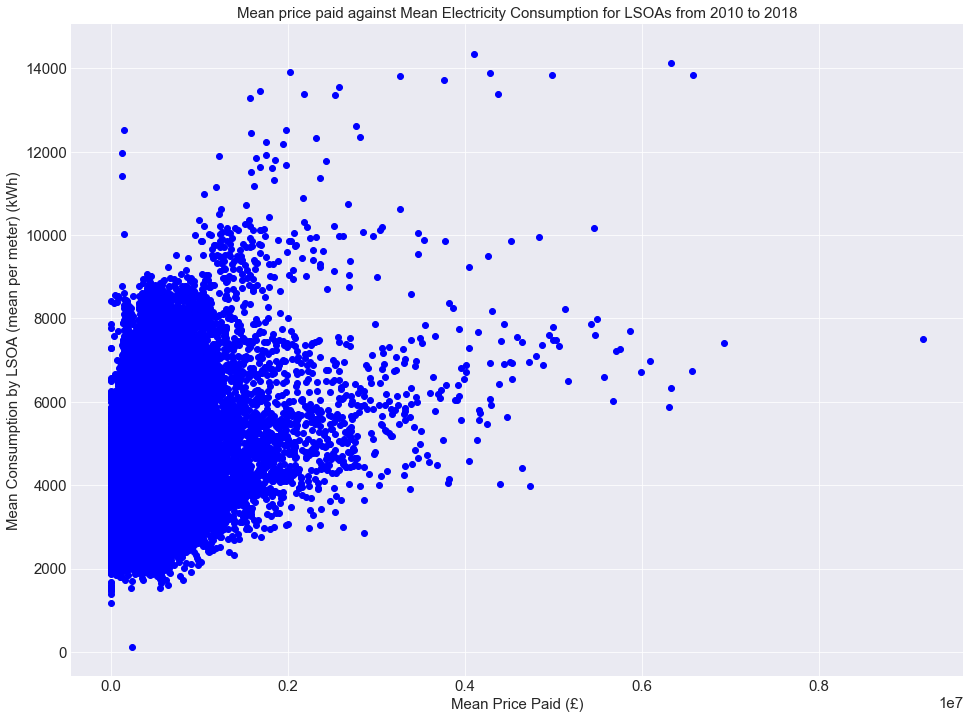

In [96]:
plt.scatter(df_LSOA_EnergyConsumption_ResPropertySales.Mean_price_paid, df_LSOA_EnergyConsumption_ResPropertySales.Mean_domestic_electricity_consumption_kWh_per_meter, color='blue')
plt.xlabel("Mean Price Paid (£)")
plt.ylabel("Mean Consumption by LSOA (mean per meter) (kWh)")
plt.title("Mean price paid against Mean Electricity Consumption for LSOAs from 2010 to 2018")
x=df_LSOA_EnergyConsumption_ResPropertySales['Mean_price_paid']
y=df_LSOA_EnergyConsumption_ResPropertySales['Mean_domestic_electricity_consumption_kWh_per_meter']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

In [97]:
plt.rcParams['figure.figsize'] = [16, 12]

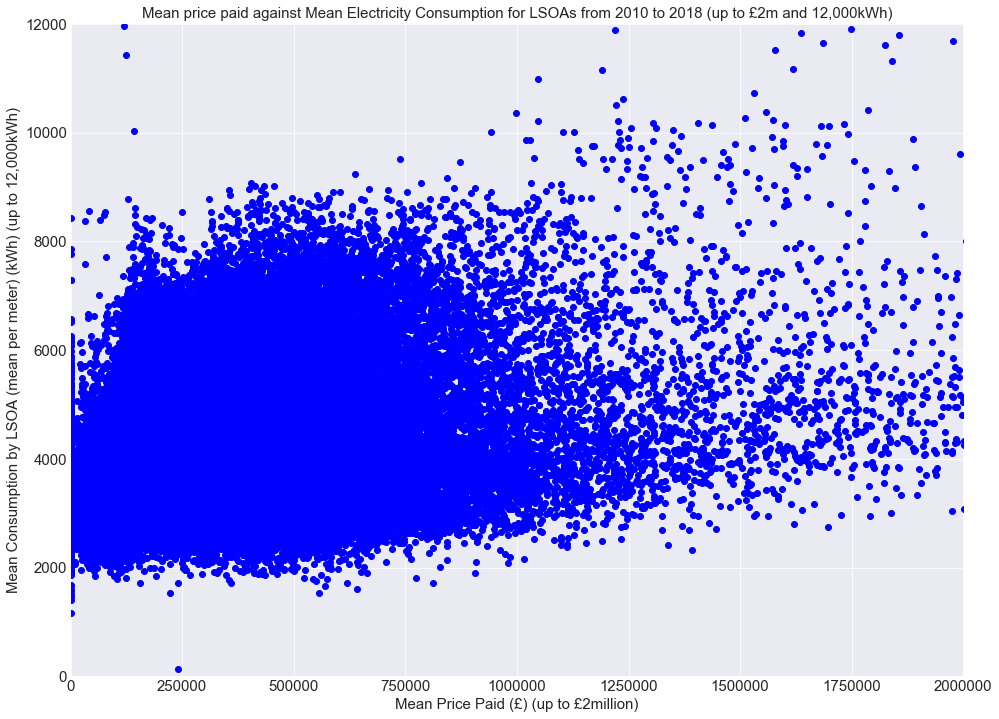

In [98]:
plt.scatter(df_LSOA_EnergyConsumption_ResPropertySales.Mean_price_paid, df_LSOA_EnergyConsumption_ResPropertySales.Mean_domestic_electricity_consumption_kWh_per_meter, color='blue')
plt.xlabel("Mean Price Paid (£) (up to £2million)")
plt.ylabel("Mean Consumption by LSOA (mean per meter) (kWh) (up to 12,000kWh)")
plt.title("Mean price paid against Mean Electricity Consumption for LSOAs from 2010 to 2018 (up to £2m and 12,000kWh)")
plt.axis([100, 2000000, 0, 12000])
#ax.set(xlim=(0, 2000000), ylim=(0, 12000))

plt.show()

In [32]:
rng = np.random.RandomState(0)

In [59]:
colors = rng.rand(413150)
sizes = 1000 * rng.rand(413150)

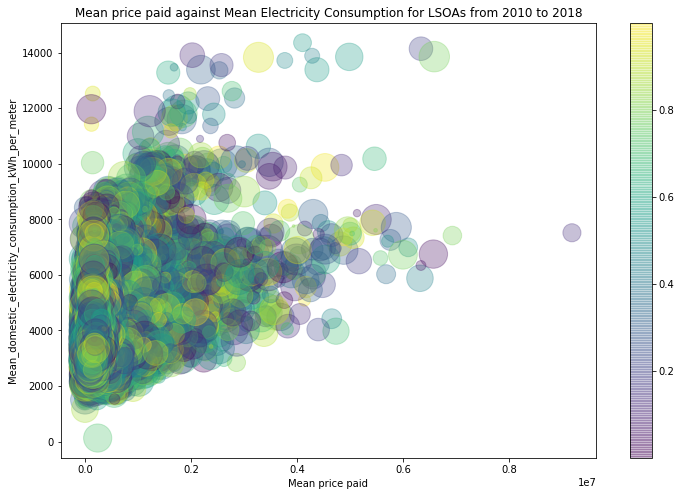

In [60]:
plt.scatter(df_LSOA_EnergyConsumption_ResPropertySales.Mean_price_paid, df_LSOA_EnergyConsumption_ResPropertySales.Mean_domestic_electricity_consumption_kWh_per_meter, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.xlabel("Mean price paid")
plt.ylabel("Mean_domestic_electricity_consumption_kWh_per_meter")
plt.title("Mean price paid against Mean Electricity Consumption for LSOAs from 2010 to 2018")
x=df_LSOA_EnergyConsumption_ResPropertySales['Mean_price_paid']
y=df_LSOA_EnergyConsumption_ResPropertySales['Mean_domestic_electricity_consumption_kWh_per_meter']

plt.colorbar();  # show color scale
plt.show()


In [61]:
df_LSOA_Location_Energy_Sales = df_LSOA_EnergyConsumption_ResPropertySales[df_LSOA_EnergyConsumption_ResPropertySales['Local authority name'].isin(['City of London'])]

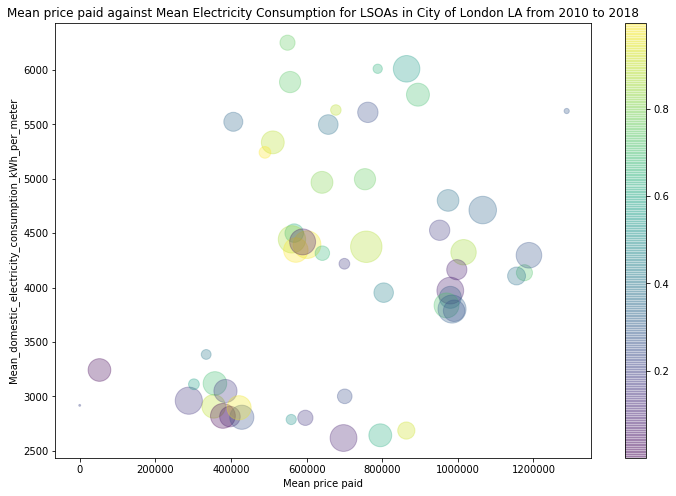

In [62]:
colors = rng.rand(60)
sizes = 1000 * rng.rand(60)


plt.scatter(df_LSOA_Location_Energy_Sales.Mean_price_paid, df_LSOA_Location_Energy_Sales.Mean_domestic_electricity_consumption_kWh_per_meter, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.xlabel("Mean price paid")
plt.ylabel("Mean_domestic_electricity_consumption_kWh_per_meter")
plt.title("Mean price paid against Mean Electricity Consumption for LSOAs in City of London LA from 2010 to 2018")
plt.colorbar();  # show color scale
plt.show()

In [63]:
df_LSOA_Location_Energy_Sales = df_LSOA_EnergyConsumption_ResPropertySales[df_LSOA_EnergyConsumption_ResPropertySales['Year'].isin(['2018'])]

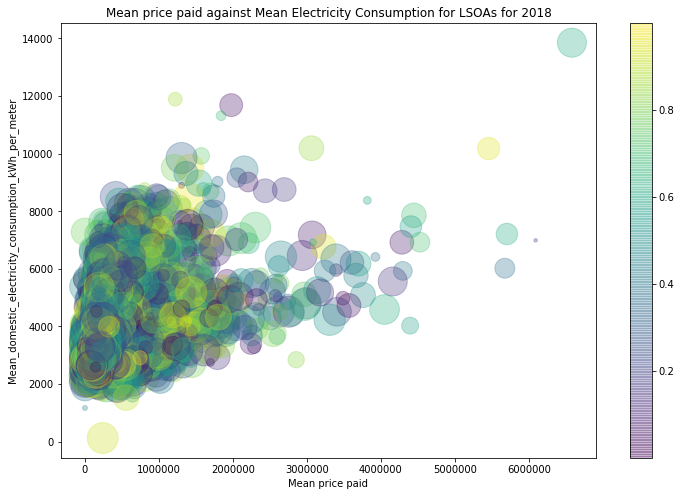

In [64]:
colors = rng.rand(42045)
sizes = 1000 * rng.rand(42045)


plt.scatter(df_LSOA_Location_Energy_Sales.Mean_price_paid, df_LSOA_Location_Energy_Sales.Mean_domestic_electricity_consumption_kWh_per_meter, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.xlabel("Mean price paid")
plt.ylabel("Mean_domestic_electricity_consumption_kWh_per_meter")
plt.title("Mean price paid against Mean Electricity Consumption for LSOAs for 2018")
plt.colorbar();  # show color scale
plt.show()

The following pandas dataframe functions are also run to visually check that the data frame is as expected:

.head() - displays the top entries
.tail() - displays the last entries
.info() - provides the number of entries / feature vectors, null objects and data types for each feature variable / column.
.describe() - provides a statistical overview
.idmax - displays the maximum value and feature vector for the requested column and is a useful manual check on potential outliers, enabling further removal/cleaning if required.

In [ ]:
df_LSOA_EnergyConsumption_ResPropertySales.info()

In [ ]:
df_LSOA_EnergyConsumption_ResPropertySales.describe()

In [ ]:
pd.isna(df_LSOA_EnergyConsumption_ResPropertySales).sum()

In [ ]:
df_LSOA_EnergyConsumption_ResPropertySales = df_LSOA_EnergyConsumption_ResPropertySales.dropna()

In [ ]:
pd.isna(df_LSOA_EnergyConsumption_ResPropertySales).sum()

In [ ]:
df_LSOA_EnergyConsumption_ResPropertySales.info()

Saves the data frame to the folder '1_DataCleaning' as a csv.

In [ ]:
df_LSOA_EnergyConsumption_ResPropertySales.to_csv('1_DataCleaning/LSOAEnergyConsumption_ResPropertySales.csv')